In [1]:
import pandas as pd
import numpy as np
from os import listdir
from matplotlib import image
import PIL
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

Matplotlib created a temporary config/cache directory at /var/folders/qg/3g0js9hs4bdgdp5hy2nz55mh0000gq/T/matplotlib-sj85pcmu because the default path (/Users/niki/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Get the data.

In [192]:
X = []
X = pd.read_excel('features_spheroids.xlsx')
X.shape

(1224, 41)

In [193]:
X.columns

Index(['file-path', 'homo_c', 'homo_d', 'hetero', 'a-count', 'b-count',
       'c-color-count', 'c-express-count', 'd-color-count', 'd-express-count',
       'cell-count', 'num_green_regions', 'num_lone_green_regions',
       'green_avg_regionArea_fract', 'green_area_fract', 'green_avg_cent_dist',
       'green_region_width', 'green_region_height',
       'green_region_aspect_ratio', 'green_region_circularity',
       'green_region_circularity_small', 'num_red_regions', 'num_red_lone',
       'red_avg_regionArea_fract', 'red_area_fract', 'red_avg_cent_dist',
       'red_region_width', 'red_region_height', 'red_region_aspect_ratio',
       'red_region_circularity', 'red_region_circularity_small',
       'green_red_centroid_dist', 'green_region_avg_red_contig',
       'red_region_avg_green_contig', 'green_red_contig_dif',
       'num_blue_regions', 'num_blue_lone', 'blue_avg_regionArea_fract',
       'blue_area_fract', 'blue_avg_cent_dist', 'contiguous_area'],
      dtype='object')

# Clustering all the data!

In [194]:
features = ["num_green_regions","num_red_regions",
            "num_lone_green_regions",
            "green_avg_regionArea_fract",
            "green_avg_cent_dist",
            "green_region_circularity",
#             "green_region_circularity_small",
            "num_red_lone",
            "red_avg_regionArea_fract",
            "red_avg_cent_dist",
            "red_region_circularity",
#             "red_region_circularity_small",
            "red_region_avg_green_contig",
            "green_red_contig_dif",
            "contiguous_area"]

In [195]:
scaler = StandardScaler()
X[features] = scaler.fit_transform(X[features])

In [196]:
inertia=[]
for i in range(2,15):
    kmeans = KMeans(n_clusters=i, random_state=0,n_init=25).fit(
        X[features])
    inertia.append(kmeans.inertia_)

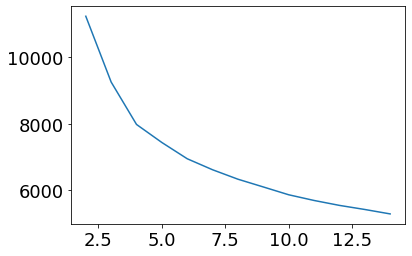

In [197]:
plt.plot(range(2,15),inertia)

In [198]:
n = 6
kmeans = KMeans(n_clusters=n, random_state=0,n_init=25).fit(
        X[features])

In [199]:
kmeans.cluster_centers_

array([[-0.88782815,  0.67567088, -0.67782292,  1.07425954, -1.0384408 ,
         0.42649291,  0.07420594, -0.60966771,  0.7708981 ,  0.14415356,
        -0.99881596,  0.91790752,  0.58146053],
       [ 1.19652194,  0.96503385,  2.64829448, -1.18268276,  0.55252007,
        -0.06309563,  2.66239713, -0.82739939,  0.34620351,  0.1433772 ,
         0.93272506,  0.38099236, -2.00647813],
       [ 0.55452646,  0.24754967, -0.26165616, -0.8275349 ,  0.74504561,
         0.08828523, -0.24986106, -0.51453082,  0.34666491,  0.14958513,
         0.18593067,  0.33727478, -2.50707633],
       [-0.90889743,  0.5760783 , -0.27590086,  1.07309748, -1.0435111 ,
         0.08302412, -0.11450886, -0.60327076,  0.64094129, -0.5316712 ,
         0.15678725, -0.56067377,  0.2316138 ],
       [ 1.22196856, -1.31767669,  0.28192585, -1.02175461,  1.13350393,
        -0.3782335 , -0.44695199,  1.76328819, -1.67013205,  0.48517549,
         0.01875838, -0.24911868,  0.08696418],
       [ 0.0744588 , -0.205103

In [200]:
scaler.inverse_transform(kmeans.cluster_centers_)

array([[1.04347826, 3.65700483, 0.73913043, 0.42445652, 1.43545589,
        0.8673414 , 1.61352657, 0.1429053 , 3.9836372 , 0.82749401,
        0.56964401, 0.33012901, 0.87744816],
       [4.10810811, 4.04054054, 9.02702703, 0.07645873, 3.42233784,
        0.7965873 , 6.51351351, 0.11145376, 3.53476757, 0.82737797,
        0.87401338, 0.25211504, 0.15418932],
       [3.1641791 , 3.08955224, 1.7761194 , 0.13121896, 3.66277463,
        0.81846448, 1.        , 0.15664791, 3.53525522, 0.82830582,
        0.75633463, 0.24576286, 0.01428567],
       [1.0125    , 3.525     , 1.740625  , 0.42427734, 1.42912381,
        0.81770416, 1.25625   , 0.14382934, 3.84628281, 0.72648416,
        0.75174225, 0.1152906 , 0.77967547],
       [4.14552239, 1.01492537, 3.13059701, 0.10127223, 4.14790336,
        0.75104437, 0.62686567, 0.48568097, 1.40365541, 0.87846369,
        0.72999187, 0.16055967, 0.73924981],
       [2.45833333, 2.48958333, 2.20833333, 0.17906106, 3.40139965,
        0.79831365, 1.21527

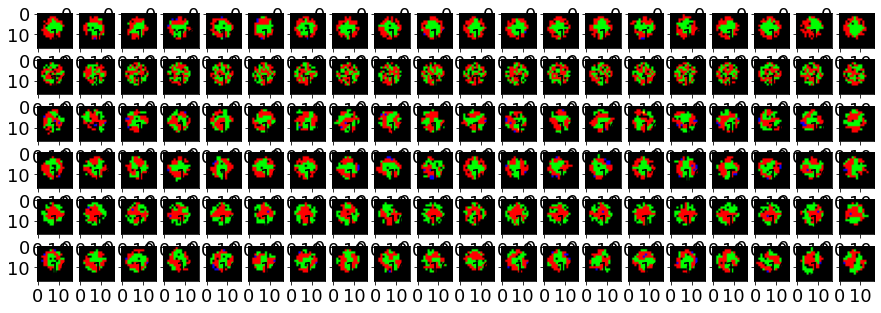

In [201]:
import random
import matplotlib.pyplot as plt

X["label"]= kmeans.labels_
fig=plt.figure(figsize=(15,5))
c = 0
for i in range(n):
    group = X[X["label"] == i]
    group_sample=random.sample(list(group["file-path"]),20)    
    for j in group_sample:
        c = c+1
        img = Image.open(j)
        rgb = img.convert('RGB')
        fig.add_subplot(n, 20, c)
        plt.imshow(rgb)

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [186]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,perplexity=100.0).fit_transform(X[features])
X_embedded.shape

(1224, 2)

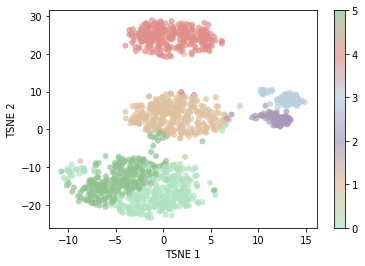

In [187]:
colors = ['#AFE3C0','#DFC09F','#A799B7','#B8CFDE','#E08F89','#90C290']
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
            c=X.label, edgecolor='none', alpha=0.7,
            cmap=cmap1)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.colorbar();

<Figure size 432x288 with 0 Axes>

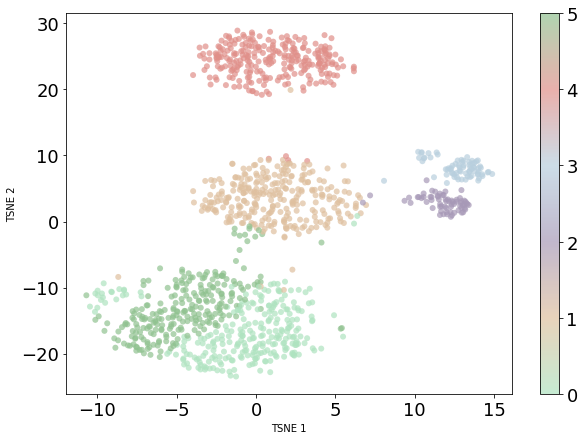

In [190]:
plt.savefig('TSNE.png')
plt.rc('xtick',labelsize=18)
plt.rc('ytick',labelsize=18)
fig=plt.figure(figsize=(10,7))
fig=plt.scatter(X_embedded[:, 0], X_embedded[:, 1],
            c=X.label, edgecolor='none', alpha=0.7,
            cmap=cmap1)
fig=plt.xlabel('TSNE 1')
fig=plt.ylabel('TSNE 2')
fig=plt.colorbar();
plt.savefig('TSNE.png')

In [163]:
X.to_excel("labelled_spheroids_6_clusters_FINAL.xlsx")